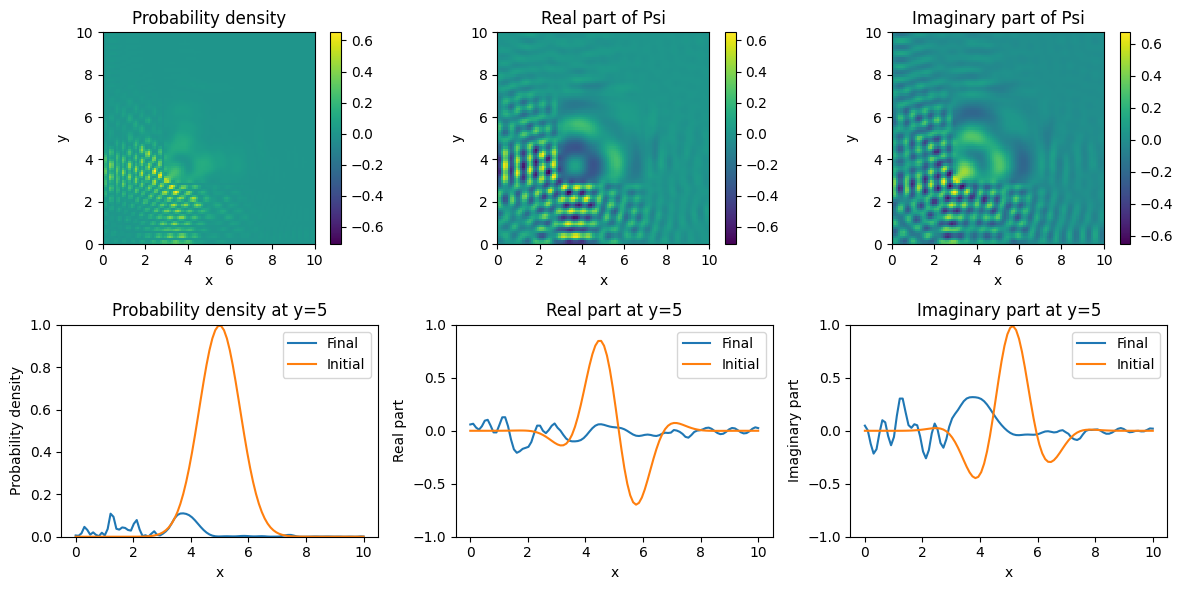

In [1]:
"""

Simulates the time evolution of a wave packet in a 2D potential well using the Crank-Nicolson method.

parameters:
-----------

Lx : float
    size of the system in the x-direction
Ly : float
    size of the system in the y-direction
Nx : int
    number of spatial grid points in the x-direction
Ny : int
    number of spatial grid points in the y-direction
dx : float
    spatial step size in the x-direction
dy : float
    spatial step size in the y-direction
dt : float
    time step size.
timesteps : int
    number of time steps
x0 : float
    initial x-coordinate of the wave packet
y0 : float
    initial y-coordinate of the wave packet
kx0 : float
    initial wavevector in the x-direction
ky0 : float
    initial wavevector in the y-direction
sigma : float
    width parameter of the Gaussian wave packet
hbar : float
    reduced Planck constant
m : float
    particle mass

returns:
--------
None

"""


import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

# physical consts
hbar = 1.0
m = 1.0

# params
Lx = Ly = 10.0       # size of the system in x and y
Nx = Ny = 100 #50 #100    # num of spatial grid points
dx = dy = Lx / Nx    # spatial step size
dt = 0.1 #0.01       # time step size
timesteps = 10 #1000     # num of time steps

# def the potential well -- square well for simplicity 
def potential(x, y):
    pot = np.zeros((Nx, Ny))
    pot[(3.0 <= x) & (x <= 7.0) & (3.0 <= y) & (y <= 7.0)] = 0.0  # inside the potential well
    pot[(x < 3.0) | (x > 7.0) | (y < 3.0) | (y > 7.0)] = 100.0   # otuside the potential well
    return pot

# init wavefunction
Psi = np.zeros((Nx, Ny), dtype=complex)

# init condition (gaussian wave packet)
x0, y0 = 5.0, 5.0
kx0, ky0 = 2.0, 2.0
sigma = 1.0
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
Psi = np.exp(-((X-x0)**2 + (Y-y0)**2) / (2*sigma**2)) * np.exp(1j*(kx0*X + ky0*Y))

# construct spatial Laplacian mat
Lx = np.diag(-2*np.ones(Nx)) + np.diag(np.ones(Nx-1), k=1) + np.diag(np.ones(Nx-1), k=-1)
Ly = np.diag(-2*np.ones(Ny)) + np.diag(np.ones(Ny-1), k=1) + np.diag(np.ones(Ny-1), k=-1)
Lx /= dx**2
Ly /= dy**2
H0 = np.kron(np.eye(Ny), Lx) + np.kron(Ly, np.eye(Nx))

# construct potential matrix
potential_matrix = potential(X, Y).flatten()

# construct Hamiltonian operator
H = H0 + np.diag(potential_matrix)

# implement Crank-Nicolson method for time evolution
Psi_initial = Psi.copy()
for t in range(timesteps):
    # print current timestep
    if t % 1 == 0: print("Timestep:", t, end='\r');
    # construct matrices for the CN method
    A = 0.5j * hbar * dt * H
    B = np.eye(Nx*Ny) + A
    C = np.eye(Nx*Ny) - A
    #  CN step
    Psi = np.linalg.solve(B, np.dot(C, Psi.flatten())).reshape((Nx, Ny))

# plot the final wavefunction
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

im = axs[0,0].imshow(np.abs(Psi)**2, extent=(x[0], x[-1], y[0], y[-1]), origin='lower', aspect='equal', 
                     interpolation='nearest', vmin=np.min(np.real(Psi)), vmax=np.max(np.real(Psi)))
axs[0,0].set_title('Probability density')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')
fig.colorbar(im, ax=axs[0,0])

im = axs[0,1].imshow(np.real(Psi), extent=(x[0], x[-1], y[0], y[-1]), origin='lower', aspect='equal', 
                     interpolation='nearest', vmin=np.min(np.real(Psi)), vmax=np.max(np.real(Psi)))
axs[0,1].set_title('Real part of Psi')
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('y')
fig.colorbar(im, ax=axs[0, 1])

im = axs[0,2].imshow(np.imag(Psi), extent=(x[0], x[-1], y[0], y[-1]), origin='lower', interpolation='nearest', aspect='equal', 
                     vmin=np.min(np.imag(Psi)), vmax=np.max(np.imag(Psi)))
axs[0,2].set_title('Imaginary part of Psi')
axs[0,2].set_xlabel('x')
axs[0,2].set_ylabel('y')
fig.colorbar(im, ax=axs[0, 2])

y_index = int(Ny/2)

axs[1,0].plot(x, np.abs(Psi[:, y_index])**2, label='Final')
axs[1,0].plot(x, np.abs(Psi_initial[:, y_index])**2, label='Initial')
axs[1,0].set_title('Probability density at y=5')
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('Probability density')
axs[1,0].legend()
axs[1,0].set_ylim(0.0, 1.0)

axs[1,1].plot(x, np.real(Psi[:, y_index]), label='Final')
axs[1,1].plot(x, np.real(Psi_initial[:, y_index]), label='Initial')
axs[1,1].set_title('Real part at y=5')
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('Real part')
axs[1,1].legend()
axs[1,1].set_ylim(-1.0, 1.0)

axs[1,2].plot(x, np.imag(Psi[:, y_index]), label='Final')
axs[1,2].plot(x, np.imag(Psi_initial[:, y_index]), label='Initial')
axs[1,2].set_title('Imaginary part at y=5')
axs[1,2].set_xlabel('x')
axs[1,2].set_ylabel('Imaginary part')
axs[1,2].legend()
axs[1,2].set_ylim(-1.0, 1.0)

plt.tight_layout()
plt.savefig('schrodinger_wave.png', dpi=250)
plt.show()